In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df1 = pd.read_csv('train_dataset.csv')
df1

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,spongiosis,follicular_horn_plug,inflammatory_mononuclear_infiltrate,age,class
0,2,3,2,3,3,2,0,2,0,0,...,0,0,0,3,2,1,0,2,27,3
1,2,2,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,52,5
2,2,2,2,0,2,0,0,0,0,0,...,0,0,0,0,0,2,0,1,30,4
3,2,2,1,0,1,0,0,0,0,0,...,0,0,0,0,1,3,0,2,62,4
4,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,2,0,3,22,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,1,1,0,1,0,0,3,0,1,0,...,0,0,0,0,0,0,1,1,9,6
530,2,1,1,0,0,0,2,0,2,0,...,0,0,0,0,0,0,2,0,12,6
531,2,2,0,0,0,0,2,0,2,1,...,0,0,0,0,0,1,2,2,7,6
532,2,1,2,0,0,0,2,0,2,0,...,0,0,0,0,0,0,2,0,11,6


In [2]:
X_train_sm = df1.drop('class', axis=1)
y_train_sm = df1['class']

In [3]:
import pandas as pd
df2 = pd.read_csv('test_dataset.csv')
df2

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,spongiosis,follicular_horn_plug,inflammatory_mononuclear_infiltrate,age,class
0,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,36,2
1,3,1,2,3,2,2,0,2,0,0,...,0,0,0,2,0,0,0,3,16,3
2,2,1,2,0,2,0,0,0,0,0,...,0,0,0,0,0,2,0,1,35,4
3,1,3,1,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,3,60,1
4,3,2,1,0,2,0,0,0,0,0,...,0,0,0,0,0,3,0,2,45,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2,2,2,2,1,2,0,2,0,0,...,0,0,0,2,0,3,0,2,36,3
70,2,2,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,30,2
71,2,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,27,4
72,2,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,2,0,2,35,2


In [4]:
X_test = df2.drop('class',axis=1)
y_test = df2['class']

In [5]:
# SVM training and evaluation (with scaling)
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Create pipeline: scaling + SVM
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=1.0, gamma="scale", probability=False, random_state=42))
])

# 2) Train on SMOTE-balanced train set
svm_pipeline.fit(X_train_sm, y_train_sm)

# 3) Predict on test set
y_pred_svm = svm_pipeline.predict(X_test)

# 4) Metrics
acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", acc_svm)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9459459459459459

Classification Report:

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       0.91      0.83      0.87        12
           3       1.00      0.93      0.97        15
           4       0.82      0.90      0.86        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.95        74
   macro avg       0.95      0.94      0.95        74
weighted avg       0.95      0.95      0.95        74



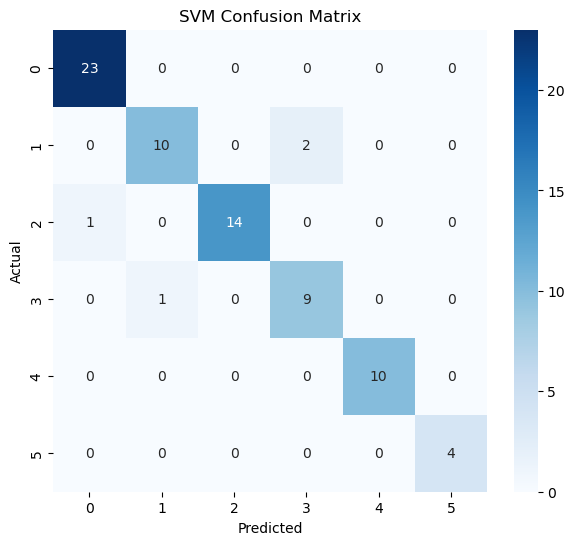

In [6]:

cm_svm = confusion_matrix(y_test, y_pred_svm)

# 5) Confusion matrix heatmap
plt.figure(figsize=(7,6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
cm_svm = confusion_matrix(y_test, y_pred_svm)

# 5) Confusion matrix heatmap
plt.figure(figsize=(7,6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()
plt.title("SVM Confusion Matrix")
plt.show()

In [7]:
# Grid search to find best SVM hyperparameters (stops after printing best params)
import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# NOTE: this code expects these variables to already exist in your session:
# X_train_sm, y_train_sm

# Pipeline (scaling + SVM)
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(random_state=42))
])

# Parameter grid (reasonable default sizes)
param_grid = [
    {   # rbf kernel
        "svc__kernel": ["rbf"],
        "svc__C": [0.1, 1, 10, 100],
        "svc__gamma": ["scale", "auto", 0.001, 0.01, 0.1],
        "svc__class_weight": [None, "balanced"]
    },
    {   # linear kernel
        "svc__kernel": ["linear"],
        "svc__C": [0.01, 0.1, 1, 10],
        "svc__class_weight": [None, "balanced"]
    },
    {   # polynomial (small degree grid)
        "svc__kernel": ["poly"],
        "svc__degree": [2, 3],
        "svc__C": [0.1, 1, 10],
        "svc__gamma": ["scale", "auto"],
        "svc__class_weight": [None, "balanced"]
    }
]

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV (stops after fitting and will output best params)
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="f1_macro",   # good for multiclass/imbalanced problems
    cv=cv,
    n_jobs=-1,
    verbose=2,
    return_train_score=False
)

# Fit on the (SMOTE-balanced) training set
grid.fit(X_train_sm, y_train_sm)

# Print best parameters and best score
print("BEST PARAMETERS:")
print(grid.best_params_)
print("\nBEST CV SCORE (f1_macro):", grid.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
BEST PARAMETERS:
{'svc__C': 10, 'svc__class_weight': None, 'svc__kernel': 'linear'}

BEST CV SCORE (f1_macro): 0.9869607003972328


Test Accuracy: 0.9594594594594594

Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      0.75      0.86        12
           3       1.00      1.00      1.00        15
           4       0.77      1.00      0.87        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.95        74
weighted avg       0.97      0.96      0.96        74



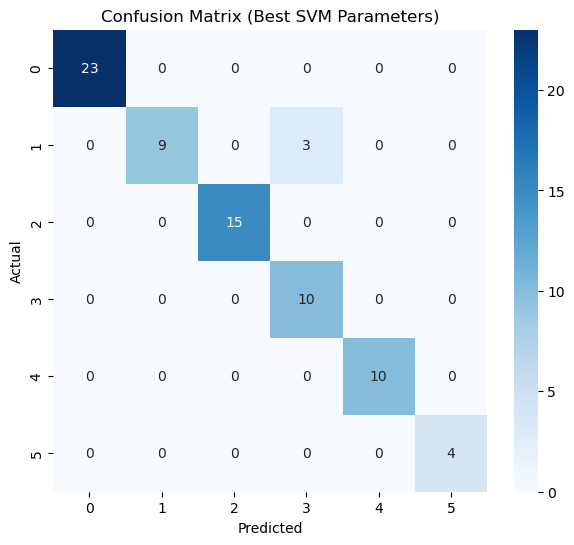

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Extract the best model from grid search
best_model = grid.best_estimator_

# 2) Train on training data (SMOTE-balanced)
best_model.fit(X_train_sm, y_train_sm)

# 3) Predict on test dataset
y_pred_best = best_model.predict(X_test)

# 4) Print accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred_best))

# 5) Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_best))

# 6) Confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(7,6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Best SVM Parameters)")
plt.show()


Macro AUC Score: 0.9967181899641577


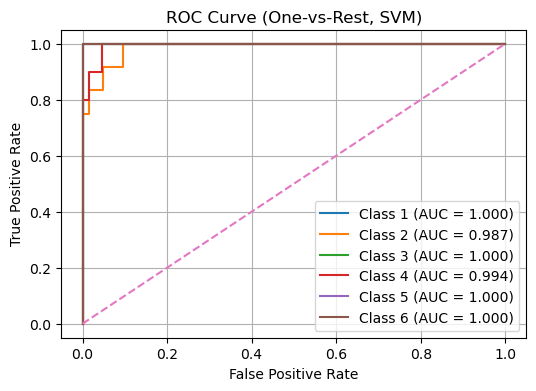

In [10]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------
# 1) Get best parameters from grid search
# ------------------------------------
best_params = grid.best_params_

# Ensure probability=True
best_params["svc__probability"] = True

# ------------------------------------
# 2) Rebuild SVM model with best params
# ------------------------------------
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

best_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(**{k.replace("svc__", ""): v for k, v in best_params.items()}))
])

# Train
best_svm.fit(X_train_sm, y_train_sm)

# ------------------------------------
# 3) Predict probabilities
# ------------------------------------
y_score = best_svm.predict_proba(X_test)

# Binarize labels for ROC (one-vs-rest)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# ------------------------------------
# 4) AUC score (macro)
# ------------------------------------
auc_macro = roc_auc_score(y_test_bin, y_score, multi_class='ovr', average='macro')
print("Macro AUC Score:", auc_macro)

# ------------------------------------
# 5) Plot ROC curve (one-vs-rest)
# ------------------------------------
plt.figure(figsize=(6, 4))

for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {cls} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest, SVM)")
plt.legend()
plt.grid(True)
plt.show()
